In [1]:
import cv2, PIL, numpy as np
import PIL.ImageGrab

In [2]:
screenshot = PIL.ImageGrab.grab

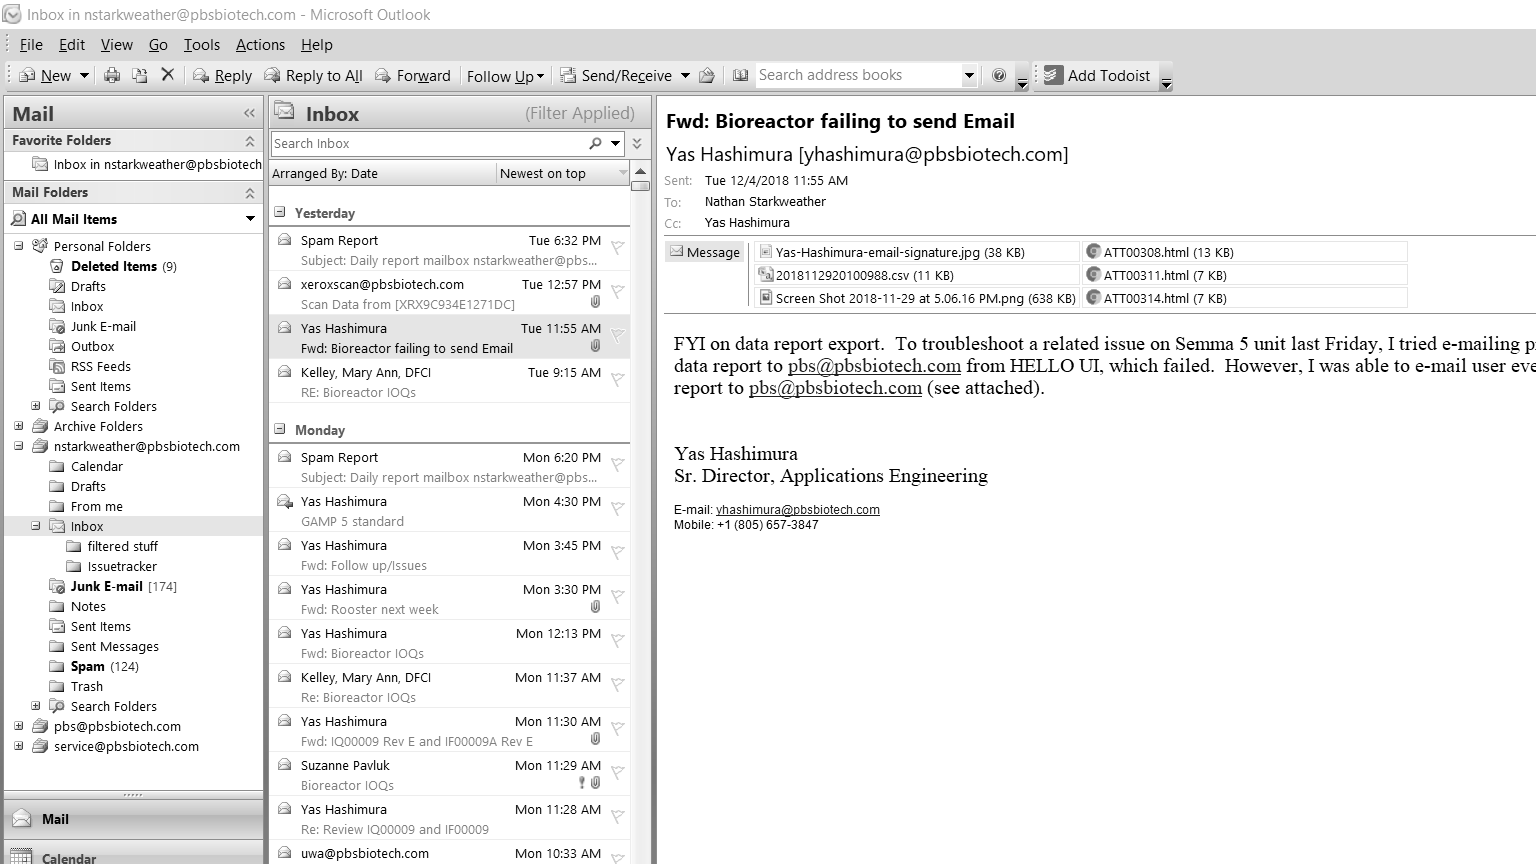

In [3]:
ss = screenshot()
ss2 = cv2.cvtColor(np.array(ss), cv2.COLOR_RGB2GRAY)
PIL.Image.fromarray(ss2)

In [25]:
img_rgb = np.array(screenshot())
img_gray = cv2.cvtColor((img_rgb), cv2.COLOR_BGR2GRAY)
template = cv2.imread('cheese.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imshow("test", img_rgb)

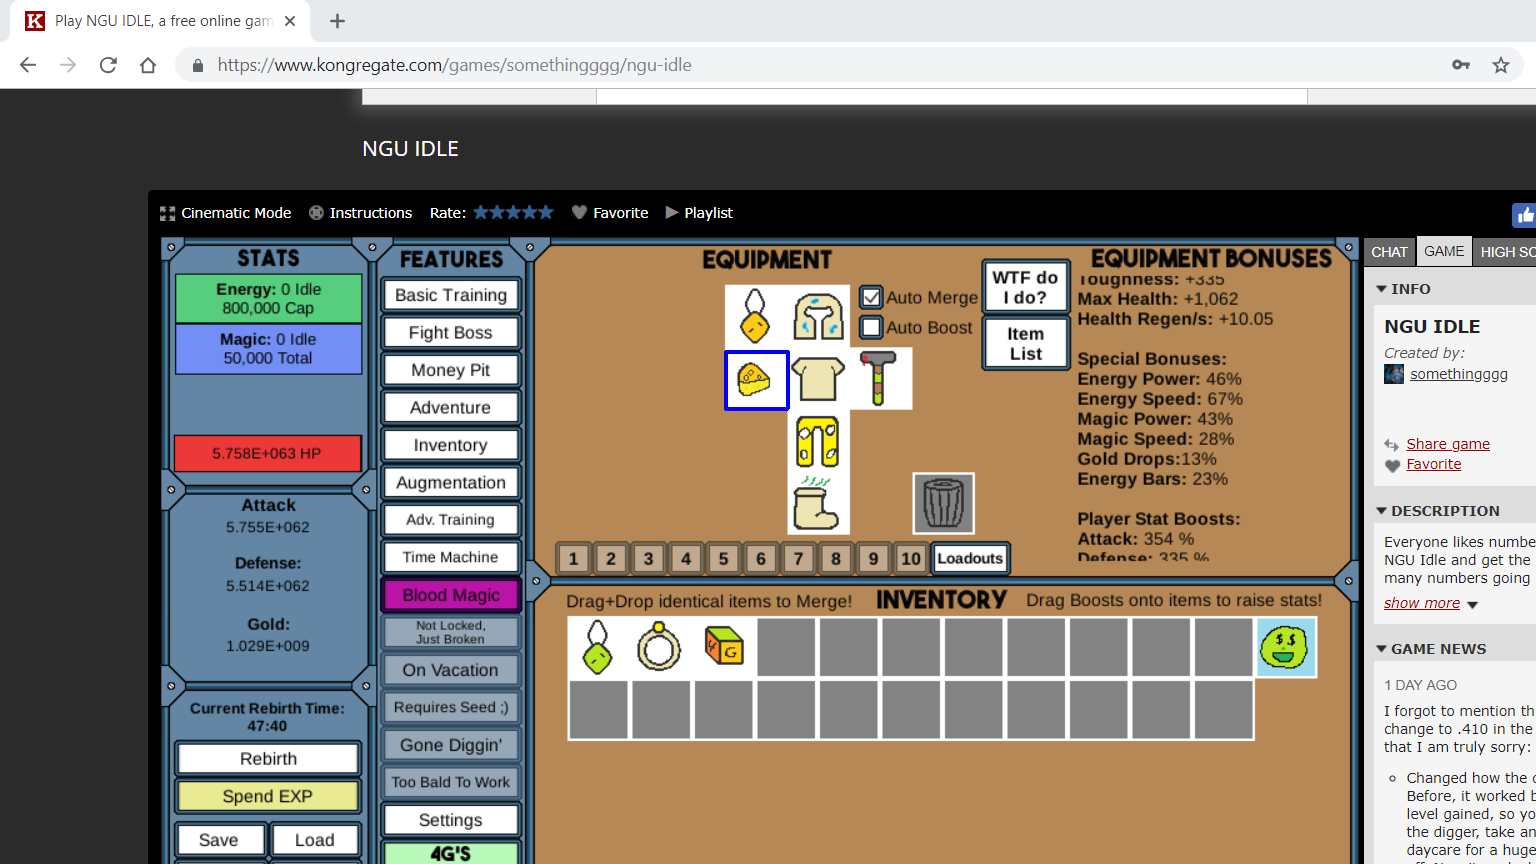

In [30]:
PIL.Image.fromarray(img_rgb)

In [32]:
loc[::-1]

(array([725, 726, 725], dtype=int64), array([351, 351, 352], dtype=int64))

In [57]:
import win32gui
import win32con

hwnd = win32gui.FindWindow(None, 'Microsoft Excel - IE000XX Matt Croughan Procedure Planning.xlsx')
win32gui.SetWindowPos(hwnd, win32con.HWND_TOPMOST, 100, 100, 300, 200, win32con.SWP_NOMOVE | win32con.SWP_NOSIZE) 